# Cyclic Simple Shear (CSS) test using MixedDriver and PM4Sand 

This notebook presents a simple example using Mixed-Driver-1.0.0. The tool runs stress-strain analyses for a variety of constitutive models using a mixed-driver methodology. Among other models the tool includes the PM4Sand model. The tool can accomodate stress, strain or mixed loading conditions. For the 2D version, loading information includes stresses in the two normal directions and shear. Loading can be either stress or strain. The material properties are defined in terms of relative density (Dr), shear modulus constant (Go), and hardening parameter (hpo). An automatic option is provided to automatically generate Go and hpo as a function of Dr. The initial condition is defined in terms of initial vertical effective stress (sigmav), Ko, and initial shear stress in terms of the ratio alpha (tau/sigmav). The loading condition is defined in terms of cyclic stress ratio (csr). The cyclic test runs untils a single direction maximum shear strain (maxStrain) is reached.

In [1]:
import os,sys
from ipywidgets import *

In [2]:
model1Pic = os.path.join('./SchematicElement.png')

file1 = open(model1Pic, "rb")
image1 = file1.read()
CSSImage = widgets.Image(
        value=image1,
        format='png',
        width=300,
        height=150
)
display(CSSImage)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x9d\x00\x00\x03\xdb\x08\x06\x00\x00\x00\xdf-\xef…

## Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from runMixedDriver import runSandMixedDriver
from plotStressStrain import plotStressStrainSand
#from CreatePlots import createPlots
from CreatePlots import *
from plotCRR import *

## Loading conditions

In [5]:
# Loading Conditions
# ------------------
CSR = 0.11        # cyclic Stress Ratio
sigmav = 101.3    # Initial vertical effective stress
maxStrain = 0.03  # Max shear strain used as criteria for liquefaction initiation
alpha = 0.0       # Initial off-center shear stress ratio 

## Material parameters

In [6]:
# Material parameters
# -------------------
inputList = {'dr': 0.667, 'Go' : 350, 'hpo':0.07, 'phic':35.6, 'emax':0.74, 'emin':0.49, 'cz':200, 'zmax': 2}

## Run OpenSees simulations

In [7]:
# Run MixedDriver for input material parameters and loading conditions. Results in .out file
CSR = 0.11
runSandMixedDriver(inputList, CSR, maxStrain, sigmav, alpha, 'csr1.out')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/c/Tools/bin/MixedDriverSand.exe': '/mnt/c/Tools/bin/MixedDriverSand.exe'

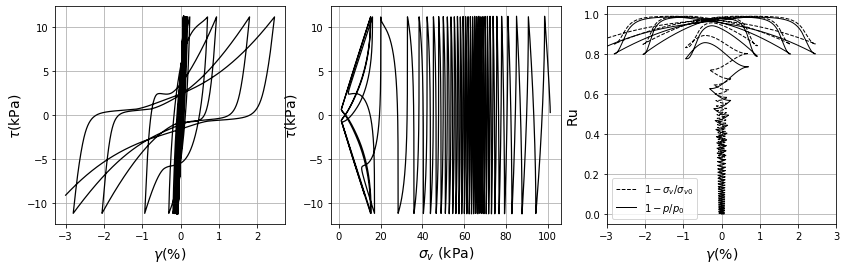

In [8]:
# Plot results
createPlots('csr1.out')

In [9]:
# Case 2
# ------
CSR = 0.12
runSandMixedDriver(inputList, CSR, maxStrain, sigmav, alpha, 'csr2.out')

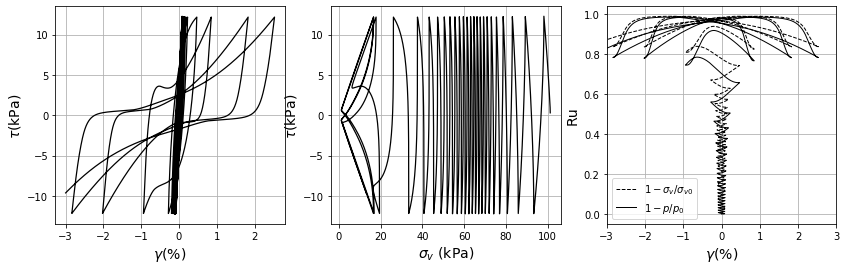

In [10]:
createPlots('csr2.out')

In [11]:
# Case 3
# ------
CSR = 0.13
runSandMixedDriver(inputList, CSR, maxStrain, sigmav, alpha, 'csr3.out')

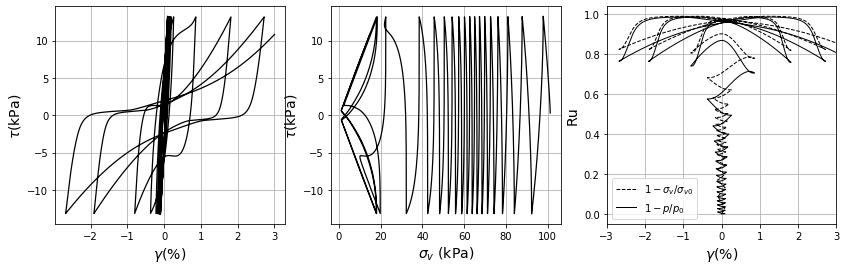

In [12]:
createPlots('csr3.out')

In [13]:
# Case 4
# ------
CSR = 0.16
runSandMixedDriver(inputList, CSR, maxStrain, sigmav, alpha, 'csr4.out')

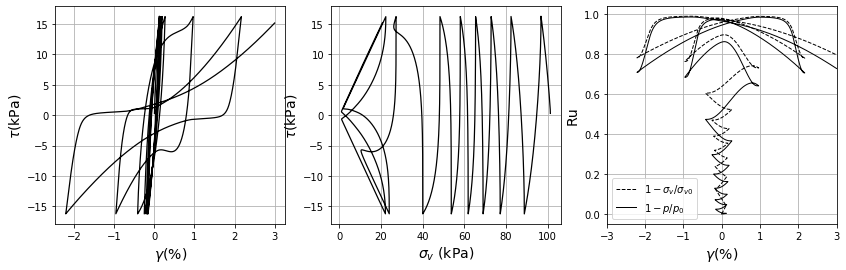

In [14]:
createPlots('csr4.out')

## Plot combined results (simulations/experimental)

In [15]:
nCRR, nCyc = calculateCRR()

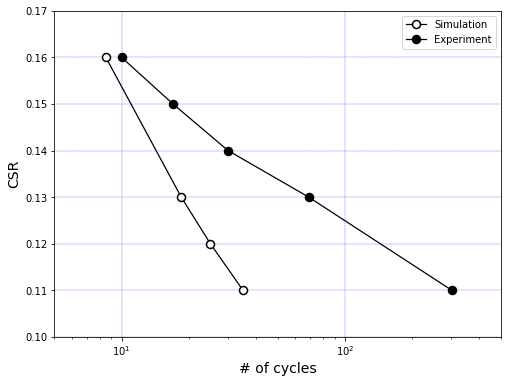

In [16]:
createCombinedPlots()